In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import ICV_img_windows, ICV_img_lbp, ICV_img_lbp_hist, ICV_plot_figs, ICV_plot_windows

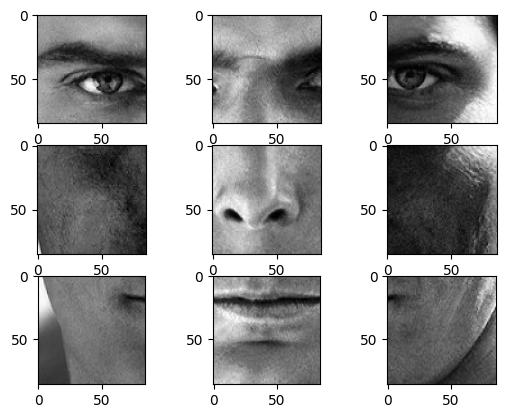

<Figure size 1200x1200 with 0 Axes>

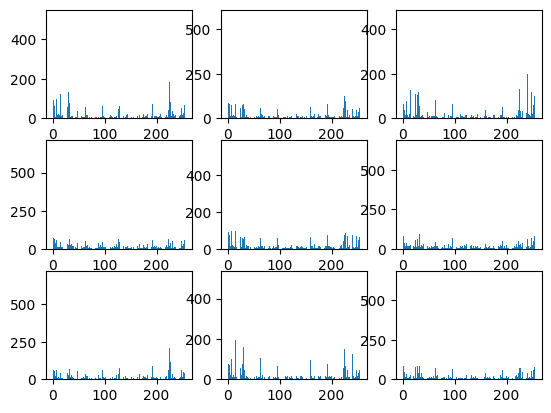

In [9]:
# Face-1 Image
# Create a global descriptor for the image
#   1. Convert image to grayscale
#   2. Split image into 9 windows
#   3. Calculate LBP descriptors for each window
#   4. Determine global descriptor using concatenation of window descriptors
#   5. Save Images for visual comparison

image_name = "face-1"

# Convert images to Gray Scale with Open CV
image = cv2.imread(f'../../data/DatasetA/{image_name}.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split the image into equal windows: this example will use 9
images = ICV_img_windows(image)

# Calculate and plot the Local Binary Patterns for each image
# Use the returned LBPs as descriptors for classification
(lbp_descriptors, lbp_hist) = ICV_img_lbp_hist(images)

# Create descriptors from the face-1 image to classify other images as a face or car
global_desc = np.concatenate(lbp_descriptors, axis=None)

# Save and plot images
cv2.imwrite(f'../../output/cw4/{image_name}_gray.png', image)
ICV_plot_windows(images, image_name)
ICV_plot_figs(lbp_hist, image_name)



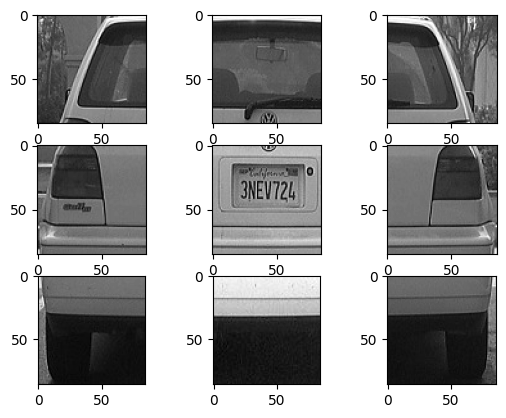

<Figure size 1200x1200 with 0 Axes>

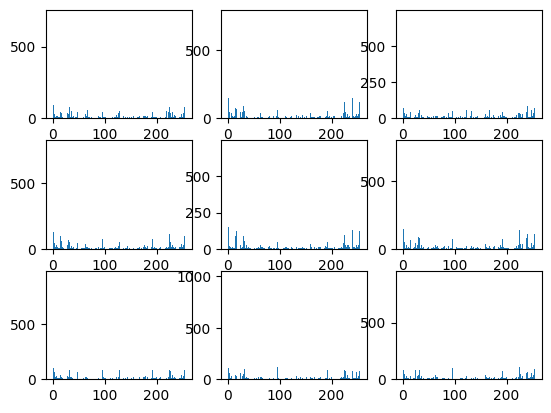

In [38]:
# Car-1 Image
# Create a global descriptor for the image
#   1. Convert image to grayscale
#   2. Split image into 9 windows
#   3. Calculate LBP descriptors for each window
#   4. Determine global descriptor using concatenation of window descriptors
#   5. Save Images for visual comparison

image_name = "car-3"

# Convert images to Gray Scale with Open CV
image2 = cv2.imread(f'../../data/DatasetA/{image_name}.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Split the image into equal windows: this example will use 9
images = ICV_img_windows(image2)

# Calculate and plot the Local Binary Patterns for each image
# Use the returned LBPs as descriptors for classification
(lbp_descriptors, lbp_hist) = ICV_img_lbp_hist(images)

# Create descriptors from the face-1 image to classify other images as a face or car
global_desc2 = np.concatenate(lbp_descriptors, axis=None)

# Save and plot images
cv2.imwrite(f'../../output/cw4/{image_name}_gray.png', image2)
ICV_plot_windows(images, image_name)
ICV_plot_figs(lbp_hist, image_name)


In [39]:
# Calculate the difference between the lbp values and plot them
result_min = np.minimum(global_desc, global_desc2)
result = np.abs(global_desc - global_desc2)


In [40]:
# Classify the images using Face 1 image as the reference
# The face images should contain a similar global description <5% where the car could be >25%

face1_classifier = np.sum(global_desc)
img_classifier = np.sum(global_desc2)
class_diff = np.abs(face1_classifier - img_classifier)
error = (1 - (class_diff / face1_classifier)) * 100

print(error)


99.12535383382145


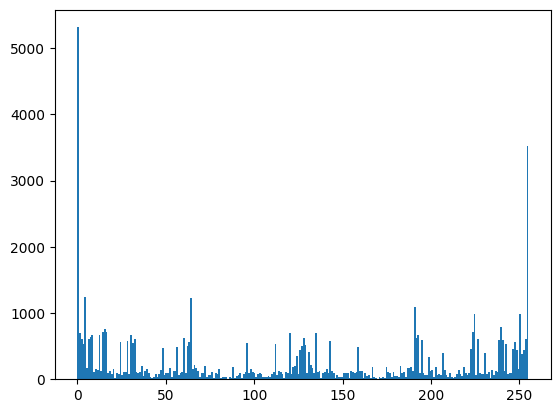

In [12]:
# Save and Plot Global Descriptors -- Face
plt.hist(global_desc, bins=256)
plt.savefig('../../output/cw4/face1_global_desc.png')

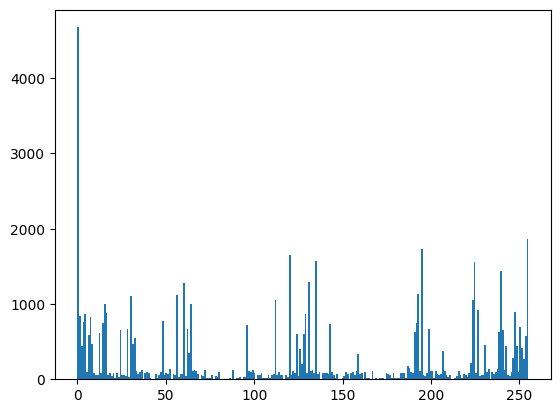

In [13]:
# Save and Plot Global Descriptors -- Car
plt.hist(global_desc2, bins=256)
plt.savefig('../../output/cw4/car1_global_desc.png')

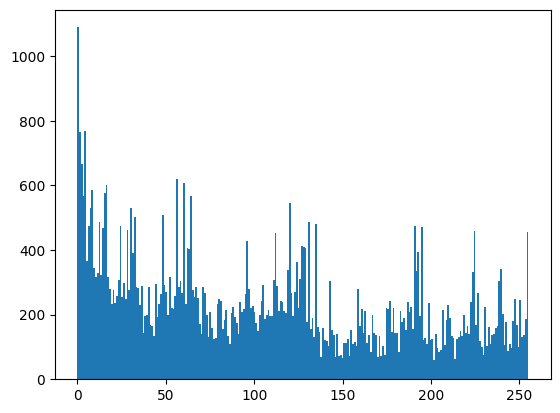

In [14]:
# Save and Plot Global Descriptors -- Result
plt.hist(result, bins=256)
plt.savefig('../../output/cw4/result_global_desc.png')